#### Notebook Objective:
This notebook is aimed at evaluating if the **description, summary or title text data** is able to classify the `deal_type`. The idea is to determine if simply looking at the text can help us make better predictions than randomly guessing.

---

#### Import Libraries

In [1]:
# Basic Data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Importing NLP libraries

# Importing wordcloud and its necessary stopwords package
from wordcloud import WordCloud, STOPWORDS 

# Natural Language Processing Tool Kit Imports
# Importing Natural Language ToolKit and its essential packages
import nltk

# For seeing and removing stopwords
from nltk.corpus import stopwords 

# For lemmatizing our words 
from nltk.stem import WordNetLemmatizer

# For stemming our words 
from nltk.stem import PorterStemmer

# for cleaning punctuations
import string 

# Regex libraries
import re

# For tokenizations
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
#Modelling Libraries

#Train-test split
from sklearn.model_selection import train_test_split

# Standard scaler for importing libraries
from sklearn.preprocessing import StandardScaler

# Importing classification models 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Evaluation Metrics libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For building up a pipeline
from sklearn.pipeline import Pipeline

# GridSearch cross-validation library
from sklearn.model_selection import GridSearchCV

# importing joblib to save models 
from joblib import dump, load

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

---

#### Import and Inspect data

In [4]:
master = pd.read_csv('clean_data_w_deal.csv')

In [5]:
master.shape

(31604, 118)

In [6]:
master.head()

,title,summary,description,transit,house_rules,max_guests,bathrooms,bedrooms,beds,price,...,cancellation_policy_moderate,cancellation_policy_strict,room_type_entire_home/apt,room_type_private_room,room_type_shared_room,experiences_offered_business,experiences_offered_family,experiences_offered_none,experiences_offered_romantic,experiences_offered_social
0,Quiet Room in Leafy Village near Central London,"My place is good for couples, solo adventurers...","My place is good for couples, solo adventurers...","Free parking on street, on bus route to centra...",not_available,2,2.0,1.0,1.0,39.0,...,0,0,0,1,0,0,0,1,0,0
1,Spacious room in private house.,Newly-decorated double room in beautiful house...,Newly-decorated double room in beautiful house...,Excellent transport links. Five minutes easy w...,"Sorry, but no smokers please.",2,1.0,1.0,1.0,45.0,...,0,0,0,1,0,0,0,1,0,0
2,Bright room in lovely area plus C/Breakfast,Quiet location in smart area with good restaur...,Quiet location in smart area with good restaur...,not_available,Early Check In Weekends only from 1 o Clock on...,3,1.0,1.0,2.0,60.0,...,0,0,0,1,0,0,0,1,0,0
3,"Bright, airy room by Tower Bridge and river","For solo travellers: Bright, airy room in ver...","For solo travellers: Bright, airy room in ver...",Walking In under 5 minutes you can be at Tower...,We are looking for respectful guests to share ...,1,1.0,1.0,1.0,55.0,...,0,0,0,1,0,0,0,1,0,0
4,Bright apartment at London Bridge,A bright and quiet apartment in Central London...,A bright and quiet apartment in Central London...,not_available,I would like that my guests feel like at their...,2,1.0,1.0,1.0,75.0,...,1,0,1,0,0,0,0,1,0,0


In [7]:
text_df = master[['title', 'summary', 'description', 'deal_type']]

In [8]:
text_df.head()

,title,summary,description,deal_type
0,Quiet Room in Leafy Village near Central London,"My place is good for couples, solo adventurers...","My place is good for couples, solo adventurers...",Fair
1,Spacious room in private house.,Newly-decorated double room in beautiful house...,Newly-decorated double room in beautiful house...,Fair
2,Bright room in lovely area plus C/Breakfast,Quiet location in smart area with good restaur...,Quiet location in smart area with good restaur...,Expensive
3,"Bright, airy room by Tower Bridge and river","For solo travellers: Bright, airy room in ver...","For solo travellers: Bright, airy room in ver...",Fair
4,Bright apartment at London Bridge,A bright and quiet apartment in Central London...,A bright and quiet apartment in Central London...,Good


---
#### Standardize all the text

In [9]:
#making a loop to remove any capitalization or punctuations and the digits that may represent any numeric values

for i in text_df.columns:
    #lower case all text
    text_df[i] = text_df[i].str.lower()
    
    #remove punctuations
    text_df[i] = text_df[i].str.translate(str.maketrans('', '', string.punctuation))
    
    #removing digits
    text_df[i] = text_df[i].str.translate(str.maketrans('', '', string.digits))
    
    

In [10]:
text_df

,title,summary,description,deal_type
0,quiet room in leafy village near central london,my place is good for couples solo adventurers ...,my place is good for couples solo adventurers ...,fair
1,spacious room in private house,newlydecorated double room in beautiful house ...,newlydecorated double room in beautiful house ...,fair
2,bright room in lovely area plus cbreakfast,quiet location in smart area with good restaur...,quiet location in smart area with good restaur...,expensive
3,bright airy room by tower bridge and river,for solo travellers bright airy room in very ...,for solo travellers bright airy room in very ...,fair
4,bright apartment at london bridge,a bright and quiet apartment in central london...,a bright and quiet apartment in central london...,good
...,...,...,...,...
31599,stunning flat londonfitzrovia,bright stunning flat situated right in the tre...,bright stunning flat situated right in the tre...,expensive
31600,piccadilly circus double room,fantastic double room in the heart of londons ...,fantastic double room in the heart of londons ...,expensive
31601,charming studio in paddington p,great location in paddington comfortable tripl...,great location in paddington comfortable tripl...,good
31602,marylebone high street very large double room,very large gorgeous double room in lovely hous...,very large gorgeous double room in lovely hous...,good


In [11]:
#
text_df.reset_index(inplace= True, drop = True)

In [12]:
#Checking for any nulls
text_df.isna().sum()

title          0
summary        0
description    0
deal_type      0
dtype: int64

In [13]:
#checking shape of the dataset
text_df.shape

(31604, 4)

In [14]:
#Checking for target class imbalances
text_df.deal_type.value_counts()

fair         13547
good         10624
expensive     7433
Name: deal_type, dtype: int64

---
##### Combining all Text Columns

In [15]:
#Checking all column names to combine
text_df.columns

Index(['title', 'summary', 'description', 'deal_type'], dtype='object')

In [16]:
#Adding columns ti make a new column
text_df['all_text'] = text_df['title'] + ' ' + text_df['summary'] + ' ' + text_df['description']

In [17]:
#making a new dataframe with only one text column for simplicity
nlp_df = text_df[['all_text', 'deal_type']]

In [18]:
#checking new df
nlp_df.head()

,all_text,deal_type
0,quiet room in leafy village near central londo...,fair
1,spacious room in private house newlydecorated ...,fair
2,bright room in lovely area plus cbreakfast qui...,expensive
3,bright airy room by tower bridge and river for...,fair
4,bright apartment at london bridge a bright and...,good


## Train-Test Split

In [19]:
#Intitate the Train Test Split
X = nlp_df['all_text']
y = nlp_df['deal_type']

# We will stratify in order to ensure our data is evenly split for all deal_types 
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 88)

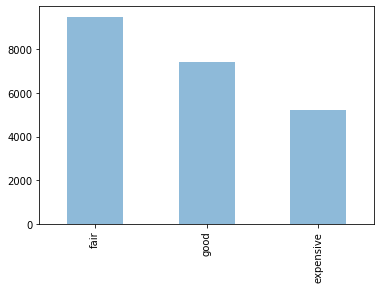

In [20]:
#Checking to ensure the data are balanced (visuals)
y_rem.value_counts().plot(kind='bar', alpha = 0.5)

In [21]:
#Checking target class once again in the training set
y_rem.value_counts()

fair         9483
good         7436
expensive    5203
Name: deal_type, dtype: int64

We have a clear case of class imbalances, so we will vectorize and then upsample using `SMOTE` method.

In [22]:
#Defining custom tokenizer

nltk.download('stopwords')
from nltk.corpus import stopwords 
ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    
    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\safiu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stemmer = nltk.stem.PorterStemmer()
vec = CountVectorizer(min_df = 10, max_df = 0.8, tokenizer = my_tokenizer)

In [24]:
%%time

#Make a baseline CountVectorizer

vec.fit(X_rem)
X_rem = vec.transform(X_rem)
X_test = vec.transform(X_test)

Wall time: 3min 18s


In [25]:
#addressing Imbalance dataset using SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8, sampling_strategy = 'all', k_neighbors=7)
X_rem, y_rem = sm.fit_sample(X_rem, y_rem)

In [26]:
%%time

# fitting a basic logistic regression model with defaults as a candidate benchmark for our hypertuned models

logreg = LogisticRegression(n_jobs = -1, random_state = 8)
logreg.fit(X_rem, y_rem)

Wall time: 6.78 s


LogisticRegression(n_jobs=-1, random_state=8)

In [27]:
# Checking accuracy scores
print('Training Score with CountVectorizer: ', round(logreg.score(X_rem,y_rem),4))
print('Test Score with CountVectorizer:     ', round(logreg.score(X_test,y_test),4))

Training Score with CountVectorizer:  0.6775
Test Score with CountVectorizer:      0.4707


##### lets see what words are dominating the predictions from the previous vectorization and remove any irrelvant words

In [28]:
#generating a dataframe with top 50 words with highest frequency after CountVectorizer
word_counts = np.array(np.sum(X_rem, axis=0)).reshape((-1,))
words = np.array(vec.get_feature_names())
words_df = pd.DataFrame({"word":words, 
                         "count":word_counts})
words_df.sort_values(by="count", ascending=False).head(50)

,word,count
2318,london,59229
3304,room,53032
1473,flat,45495
354,bedroom,41107
4234,walk,40704
347,bed,32812
2513,minut,32633
161,apart,31891
1124,doubl,31279
3720,station,29692


In [29]:
#make an array of all the high freq words to remove them later in the tokenizer by adding to stop words list
drop_words = ['street', 'area', 'bathroom', 'hous', 'locat', 'london', 'room', 'walk', 'flat', 'minut', 'bedroom', 'one',
              'station', 'bed', 'min', 'kitchen', 'apart', 'live', 'floor', 'guest', 'pleas', 'also', 'away', 'line',
             'home', 'bu', 'two', 'three', 'five', 'stay', 'travel', 'road', 'citi', ]

##### Redefine the tokenizer with high-frequency words removed

In [30]:
#adding new words to the stop words list
stopwords = nltk.corpus.stopwords.words('english')
stopwords = list(stopwords)
stopwords.extend(drop_words)

def my_tokenizer2(sentence):
    
    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
        
    # Remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in stopwords) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

##### Reset the split

- 2nd split to repeat the process with **tfidf vectorizer**  with `max_df` and new custom `tokenizer ` and `ngram_range`

In [31]:
# We will stratify in order to ensure our data is evenly split for all deal_types 
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 88)

In [32]:
%%time

#applying TFIDFVecorizer with tuned parameters for max and min document freq of 80% document and 10 words respectively

vec2 = TfidfVectorizer(min_df = 10, max_df = 0.8, tokenizer = my_tokenizer2, ngram_range = (1,2))
vec2.fit(X_rem)
X_rem = vec2.transform(X_rem)
X_test = vec2.transform(X_test)

Wall time: 2min 57s


In [33]:
#checking X_rem size
X_rem

<22122x28117 sparse matrix of type '<class 'numpy.float64'>'
	with 2127227 stored elements in Compressed Sparse Row format>

In [34]:
#Checking X_test size
X_test

<9482x28117 sparse matrix of type '<class 'numpy.float64'>'
	with 902999 stored elements in Compressed Sparse Row format>

In [35]:
#addressing Imbalance dataset using SMOTE method
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 8, sampling_strategy = 'all', k_neighbors=7)
X_rem, y_rem = sm.fit_sample(X_rem, y_rem)

In [36]:
#Checking for balanced class
y_rem.value_counts()

expensive    9483
good         9483
fair         9483
Name: deal_type, dtype: int64

In [37]:
%%time
# fitting a basic logistic regression model with defaults as a candidate benchmark for our hypertuned models

logreg = LogisticRegression(n_jobs = -1, random_state = 8)
logreg.fit(X_rem, y_rem)

Wall time: 7.53 s


LogisticRegression(n_jobs=-1, random_state=8)

In [38]:
# Checking accuracy score
print('Training Score with TFIDF: ', round(logreg.score(X_rem,y_rem),4))
print('Test Score with TFIDF:     ', round(logreg.score(X_test,y_test),4))

Training Score with TFIDF:  0.8083
Test Score with TFIDF:      0.5047


---
Since `TFIDFVectorizer` performed better than `CountVectorizer`, we will use the TFIDF vectorization for our GridSearch Cross validation and hyperparameter tuning.

---

### Deploying GridSearch Cross Validation
---

##### Build a Pipeline

In [39]:
#instantiate pipeline and grid
model_pipeline = Pipeline([('dim_reducer', TruncatedSVD()), ('model', LogisticRegression())])

---

##### Logistic Regression

In [40]:
# Intiate a parameter grid for logistic regression

logreg_param_grid = [
    {'dim_reducer': [TruncatedSVD()],
    'dim_reducer__n_components': [400,500,600],
    'model': [LogisticRegression(random_state = 8, n_jobs = -1)],
    'model__C': [ 0.1, 1, 10],
    'model__solver': ['lbfgs', 'saga', 'liblinear']}
]

In [41]:
# Instantiate the logistic regression grid search

logreg_gs = GridSearchCV(model_pipeline, param_grid = logreg_param_grid, cv=5, verbose=1, scoring = 'accuracy')

In [42]:
%%time

#Fitting the logistic Regression GridSearch
fitted_logreg_gs = logreg_gs.fit(X_rem, y_rem)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 74.0min finished


Wall time: 1h 14min 59s


##### Evaluation: Logistic Regresssion

In [43]:
#Check for best parameters and best score 

print("Best Parameters: ", fitted_logreg_gs.best_params_)
print("\nBest Score: ", fitted_logreg_gs.best_score_)

Best Parameters:  {'dim_reducer': TruncatedSVD(n_components=600), 'dim_reducer__n_components': 600, 'model': LogisticRegression(C=1, n_jobs=-1, random_state=8), 'model__C': 1, 'model__solver': 'lbfgs'}

Best Score:  0.5381573047730936


In [44]:
#Use model to predict test set
y_pred_logreg = fitted_logreg_gs.predict(X_test)

In [45]:
#Compare Training and Test set scores to ensure we are not over or under-fitting

print('Training Score: ', fitted_logreg_gs.score(X_rem,y_rem))
print('Test Score: ', fitted_logreg_gs.score(X_test,y_test))

Training Score:  0.5698970086822033
Test Score:  0.4865007382408775


 Logistic Regression Classification Report 
               precision    recall  f1-score   support

   expensive       0.44      0.56      0.49      2230
        fair       0.51      0.37      0.43      4064
        good       0.50      0.58      0.54      3188

    accuracy                           0.49      9482
   macro avg       0.48      0.50      0.49      9482
weighted avg       0.49      0.49      0.48      9482



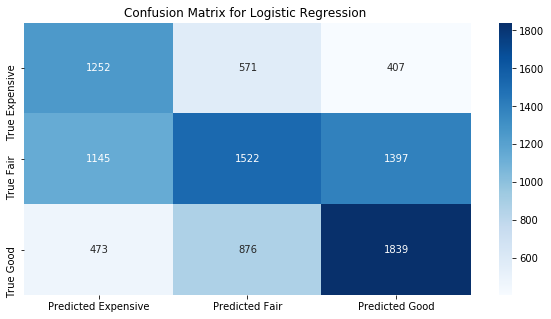

In [46]:
# Setting up our confusion matrix 
logreg_confusion_matrix = confusion_matrix(y_test,y_pred_logreg)

# Making a DataFrame of Confustion matrix for readability
logreg_confusion_matrix = pd.DataFrame(data = logreg_confusion_matrix,\
                                   columns = ['Predicted Expensive', 'Predicted Fair', 'Predicted Good'],\
                                  index = ['True Expensive','True Fair', 'True Good'])

# Setting up our classification_report
logreg_classification_report = classification_report(y_test,y_pred_logreg)
logreg_scores_dict = classification_report(y_test,y_pred_logreg, output_dict = True)

# Print Classification report
print(f' Logistic Regression Classification Report \n {logreg_classification_report}')

# Visualizing the confusion matrix heatmap
plt.figure(figsize = (10,5))
sns.heatmap(logreg_confusion_matrix, annot = True, cmap='Blues', fmt = 'g')
plt.title('Confusion Matrix for Logistic Regression ')
plt.show()

---
##### Random Forest Classifier
---

In [49]:
# Intiate a parameter grid for Random Forest Classifier

rf_param_grid = [
    
    {'dim_reducer': [TruncatedSVD()],
    'dim_reducer__n_components': [400,500],
    'model': [RandomForestClassifier(random_state = 8, n_jobs = -1)],
    'model__max_depth': [5,10,15,20],
    'model__n_estimators': [400,500]}
]

In [50]:
# Instantiate the RandomForest classifier grid search with 5 cross-validation sets

rf_gs = GridSearchCV(model_pipeline, param_grid=rf_param_grid, cv=5, verbose=1, scoring = 'accuracy')

In [51]:
%%time


#Fitting the RandomForest Classifier GridSearch
fitted_rf_gs = rf_gs.fit(X_rem, y_rem)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 99.9min finished


Wall time: 1h 41min 54s


##### Evaluation: RandomForest Classifier

In [52]:
#Check for best parameters and best score 

print("Best Parameters: ", fitted_rf_gs.best_params_)
print("\nBest Score: ", fitted_rf_gs.best_score_)

Best Parameters:  {'dim_reducer': TruncatedSVD(n_components=500), 'dim_reducer__n_components': 500, 'model': RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=-1,
                       random_state=8), 'model__max_depth': 20, 'model__n_estimators': 500}

Best Score:  0.6524342385530488


In [53]:
#Use best model to predict test set values

y_pred_rf = fitted_rf_gs.predict(X_test)

In [54]:
#Compare Training and Test set scores to ensure we are not over or under-fitting

print('Training Score: ', fitted_rf_gs.score(X_rem,y_rem))
print('Test Score: ', fitted_rf_gs.score(X_test,y_test))

Training Score:  0.9980667158775353
Test Score:  0.5066441678970681


Classification Report 
               precision    recall  f1-score   support

   expensive       0.49      0.42      0.46      2230
        fair       0.51      0.53      0.52      4064
        good       0.51      0.54      0.53      3188

    accuracy                           0.51      9482
   macro avg       0.51      0.50      0.50      9482
weighted avg       0.51      0.51      0.51      9482



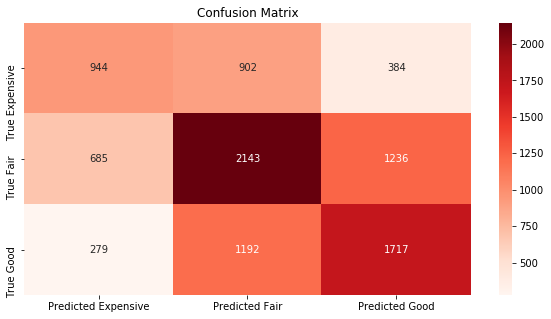

In [55]:
# Setting up our confusion matrix 
rf_confusion_matrix = confusion_matrix(y_test,y_pred_rf)

# Making a DataFrame of Confustion matrix for readability
rf_confusion_matrix = pd.DataFrame(data = rf_confusion_matrix,\
                                   columns = ['Predicted Expensive', 'Predicted Fair', 'Predicted Good'],\
                                  index = ['True Expensive','True Fair', 'True Good'])

# Setting up our classification_report
rf_classification_report = classification_report(y_test,y_pred_rf)
rf_scores_dict = classification_report(y_test,y_pred_rf, output_dict = True)

# Printing classification report
print(f'Classification Report \n {rf_classification_report}')

# Visualizing the confusion matrix heatmap
plt.figure(figsize = (10,5))
sns.heatmap(rf_confusion_matrix, annot = True, cmap='Reds', fmt = 'g')
plt.title('Confusion Matrix')
plt.show()

---
##### K-Nearest Neighbours
---

In [56]:
# Intiate a parameter grid for K-Nearest Neighbours classification

knn_param_grid = [
    
    {'dim_reducer': [TruncatedSVD()],
    'dim_reducer__n_components': [400,500],
    'model': [KNeighborsClassifier(n_jobs = -1)],
    'model__n_neighbors': [3,5,7,11],
    'model__weights': ['uniform', 'distance']}
]

In [57]:
# Instantiate the KNN classification gridsearch

knn_gs = GridSearchCV(model_pipeline, param_grid = knn_param_grid, cv=5, verbose=1, scoring = 'accuracy')

In [58]:
%%time


#Fitting the KNN model
fitted_knn_gs = knn_gs.fit(X_rem, y_rem)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 82.3min finished


Wall time: 1h 22min 54s


##### Evaluation: KNN Classification

In [59]:
#Check for best parameters and best score 

print("Best Parameters: ", fitted_knn_gs.best_params_)
print("\nBest Score: ", fitted_knn_gs.best_score_)

Best Parameters:  {'dim_reducer': TruncatedSVD(n_components=400), 'dim_reducer__n_components': 400, 'model': KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance'), 'model__n_neighbors': 3, 'model__weights': 'distance'}

Best Score:  0.6167211474924167


In [60]:
#Use best model to predict test set values

y_pred_knn = fitted_knn_gs.predict(X_test)

In [61]:
#Compare Training and Test set scores to ensure we are not over or under-fitting

print('Training Score: ', fitted_knn_gs.score(X_rem,y_rem))
print('Test Score: ', fitted_knn_gs.score(X_test,y_test))

Training Score:  0.9978909627754929
Test Score:  0.4149968361105252


Classification Report 
               precision    recall  f1-score   support

   expensive       0.43      0.33      0.37      2230
        fair       0.56      0.16      0.25      4064
        good       0.39      0.80      0.52      3188

    accuracy                           0.41      9482
   macro avg       0.46      0.43      0.38      9482
weighted avg       0.47      0.41      0.37      9482



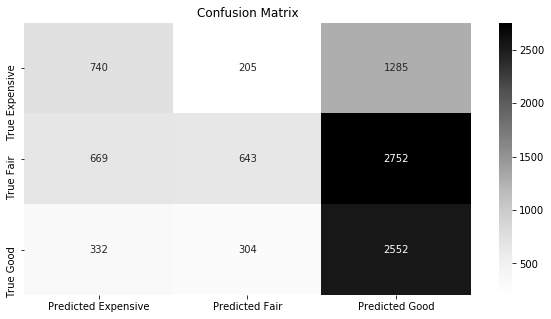

In [62]:
# Setting up our confusion matrix 
knn_confusion_matrix = confusion_matrix(y_test,y_pred_knn)

# Putting the confusion matrix in a DataFrame
knn_confusion_matrix = pd.DataFrame(data = knn_confusion_matrix,\
                                   columns = ['Predicted Expensive', 'Predicted Fair', 'Predicted Good'],\
                                  index = ['True Expensive','True Fair', 'True Good'])

# Setting up our classification_report
knn_classification_report = classification_report(y_test,y_pred_knn)
knn_scores_dict = classification_report(y_test,y_pred_knn, output_dict = True)

# Printing classification report
print(f'Classification Report \n {knn_classification_report}')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(knn_confusion_matrix, annot = True, cmap='Greys', fmt = 'g')
plt.title('Confusion Matrix')
plt.show()

---

##### Support Vector Classifier (SVC)

---

In [63]:
from sklearn.svm import SVC

In [64]:
# Intiate a parameter grid for SVC 

svm_param_grid = [
    
    {'dim_reducer': [TruncatedSVD()],
    'dim_reducer__n_components': [400,500],
    'model': [SVC(random_state = 8, probability = True)],
    'model__C': [0.1,1,10],
    'model__kernel': ['rbf', 'sigmoid']}
]

In [65]:
# Instantiate the SVC grid search

svm_gs = GridSearchCV(model_pipeline, param_grid=svm_param_grid, cv=5, verbose=1, scoring = 'accuracy')

In [66]:
%%time

#Fitting the Support vector classifier (SVC)
fitted_svm_gs = svm_gs.fit(X_rem, y_rem)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 3437.9min finished


Wall time: 2d 13h 49min 52s


##### Evaluation: Support Vector Classifier

In [67]:
#Check for best parameters and best score 

print("Best Parameters: ", fitted_svm_gs.best_params_)
print("\nBest Score: ", fitted_svm_gs.best_score_)

Best Parameters:  {'dim_reducer': TruncatedSVD(n_components=500), 'dim_reducer__n_components': 500, 'model': SVC(C=10, probability=True, random_state=8), 'model__C': 10, 'model__kernel': 'rbf'}

Best Score:  0.7009425459856703


In [68]:
#Use best model to predict test set values

y_pred_svm = fitted_svm_gs.predict(X_test)

In [69]:
#Compare Training and Test set scores to ensure we are not over or under-fitting

print('Training Score: ', fitted_svm_gs.score(X_rem,y_rem))
print('Test Score: ', fitted_svm_gs.score(X_test,y_test))

Training Score:  0.9930401771591268
Test Score:  0.5192997257962455


Classification Report 
               precision    recall  f1-score   support

   expensive       0.53      0.44      0.48      2230
        fair       0.51      0.56      0.53      4064
        good       0.53      0.53      0.53      3188

    accuracy                           0.52      9482
   macro avg       0.52      0.51      0.51      9482
weighted avg       0.52      0.52      0.52      9482



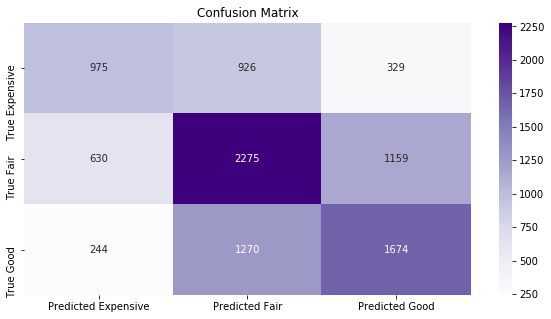

In [70]:
# Setting up our confusion matrix 
svm_confusion_matrix = confusion_matrix(y_test,y_pred_svm)

# Putting the confusion matrix in a DataFrame
svm_confusion_matrix = pd.DataFrame(data = svm_confusion_matrix,\
                                   columns = ['Predicted Expensive', 'Predicted Fair', 'Predicted Good'],\
                                  index = ['True Expensive','True Fair', 'True Good'])

# Setting up our classification_report
svm_classification_report = classification_report(y_test,y_pred_svm)
svm_scores_dict = classification_report(y_test,y_pred_svm, output_dict = True)

# Printing classification report
print(f'Classification Report \n {svm_classification_report}')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(svm_confusion_matrix, annot = True, cmap='Purples', fmt = 'g')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#dump(fitted_svm_gs, '/text_models/text_svc.joblib') 

---
##### AdaBoost Classifier
---

In [71]:
# Intiate a parameter grid for AdaBoost Classifier

ada_param_grid = [
    
    {'dim_reducer': [TruncatedSVD()],
    'dim_reducer__n_components': [500],
    'model': [AdaBoostClassifier(random_state = 8)],
    'model__n_estimators': [200,400,600],
    'model__learning_rate': [0.5,1]}
]

In [72]:
# Instantiate the AdaBoost grid search

ada_gs = GridSearchCV(model_pipeline, param_grid=ada_param_grid, cv=5, verbose=1, scoring = 'accuracy')

In [73]:
%%time


#Fitting the AdaBoost GS
fitted_ada_gs = ada_gs.fit(X_rem, y_rem)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 399.2min finished


Wall time: 7h 4min 56s


##### Evaluation: AdaBoost Classifier

In [74]:
#Check for best parameters and best score 

print("Best Parameters: ", fitted_ada_gs.best_params_)
print("Best Score: ", fitted_ada_gs.best_score_)

Best Parameters:  {'dim_reducer': TruncatedSVD(n_components=500), 'dim_reducer__n_components': 500, 'model': AdaBoostClassifier(learning_rate=0.5, n_estimators=600, random_state=8), 'model__learning_rate': 0.5, 'model__n_estimators': 600}
Best Score:  0.5130248829100404


In [75]:
#Use best model to predict test set values

y_pred_ada = fitted_ada_gs.predict(X_test)

In [76]:
#Compare Training and Test set scores to ensure we are not over or under-fitting

print('Training Score: ', fitted_ada_gs.score(X_rem,y_rem))
print('Test Score: ', fitted_ada_gs.score(X_test,y_test))

Training Score:  0.5804421948047384
Test Score:  0.4747943471841384


Classification Report 
               precision    recall  f1-score   support

   expensive       0.42      0.50      0.46      2230
        fair       0.50      0.41      0.45      4064
        good       0.49      0.54      0.52      3188

    accuracy                           0.47      9482
   macro avg       0.47      0.48      0.47      9482
weighted avg       0.48      0.47      0.47      9482



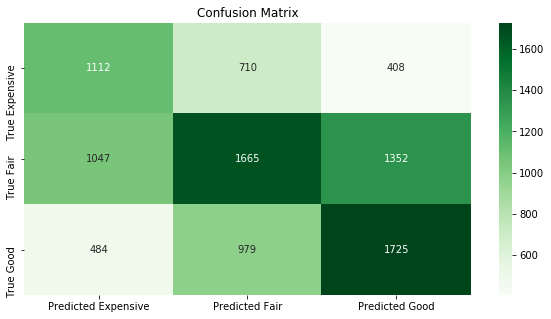

In [77]:
# Setting up our confusion matrix 
ada_confusion_matrix = confusion_matrix(y_test,y_pred_ada)

# Putting the confusion matrix in a DataFrame
ada_confusion_matrix = pd.DataFrame(data = ada_confusion_matrix,\
                                   columns = ['Predicted Expensive', 'Predicted Fair', 'Predicted Good'],\
                                  index = ['True Expensive','True Fair', 'True Good'])

# Setting up our classification_report
ada_classification_report = classification_report(y_test,y_pred_ada)
ada_scores_dict = classification_report(y_test,y_pred_ada, output_dict = True)

# Printing classification report
print(f'Classification Report \n {ada_classification_report}')

# Visualizing the heatmap
plt.figure(figsize = (10,5))
sns.heatmap(ada_confusion_matrix, annot = True, cmap='Greens', fmt = 'g')
plt.title('Confusion Matrix')
plt.show()

---
---
### Results Summary
---

In [78]:
#intialize a dataframe to store all results
model_names = ['Logistic Regression', 'Random Forest', 'KNNs', 'SVC', 'AdaBoost']
results = pd.DataFrame(columns = ['Accuracy', 'Recall', 'Precision', 'F1_score'], index = model_names)

In [79]:
#Write a loop to summarize all results by using confusion matrix dictionaries
reports = [logreg_scores_dict, rf_scores_dict, knn_scores_dict, svm_scores_dict, ada_scores_dict]

for row in range(0,results.shape[0]):
    results.Accuracy[row] = round(reports[row]['accuracy'],3)
    results.Recall[row] = round(reports[row]['macro avg']['recall'],3)
    results.Precision[row] = round(reports[row]['macro avg']['precision'],3)
    results.F1_score[row] = round(reports[row]['macro avg']['f1-score'],3)

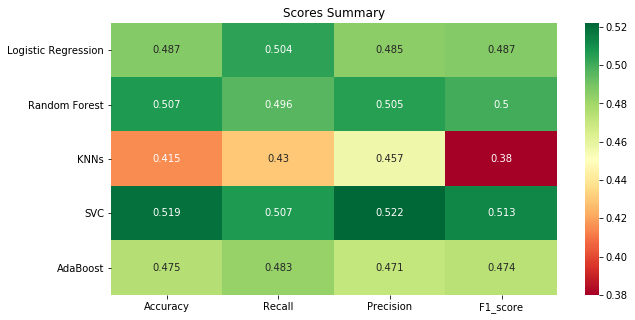

In [80]:
#display the results
results = results.astype('float')
plt.figure(figsize = (10,5))
sns.heatmap(results, annot = True, cmap='RdYlGn', fmt = 'g')
plt.title('Scores Summary')
plt.show()

#### Saving top 3 models with best results

In [86]:
dump(fitted_logreg_gs, 'text_models/text_logreg.joblib') 

['text_models/text_logreg.joblib']

In [87]:
dump(fitted_svm_gs, 'text_models/text_svc.joblib') 

['text_models/text_svc.joblib']

In [88]:
dump(fitted_rf_gs, 'text_models/text_rf.joblib') 

['text_models/text_rf.joblib']

##### Saving the results

In [81]:
#Storing Vec2 transformed data to X1 variable that will hold all the available data.
X1 = vec2.transform(X)

In [82]:
#Saving predictions in a dataframe
prob_pred = pd.DataFrame(fitted_svm_gs.predict_proba(X1))

In [83]:
prob_pred.columns = ['nlp_pred_1', 'nlp_pred_2', 'nlp_pred_3']

In [84]:
prob_pred

,nlp_pred_1,nlp_pred_2,nlp_pred_3
0,0.018513,0.860774,0.120713
1,0.030633,0.584860,0.384508
2,0.904492,0.064233,0.031275
3,0.031903,0.850543,0.117554
4,0.115649,0.619779,0.264572
...,...,...,...
31599,0.213906,0.678091,0.108003
31600,0.911785,0.065674,0.022540
31601,0.028859,0.114865,0.856276
31602,0.024264,0.140200,0.835536


In [85]:
#writing prediction probablities to a csv file to be used in future models
prob_pred.to_csv('nlp_predictions.csv', index = False)

### Fin.